#**기본 세팅**

In [1]:
import pandas as pd
df = pd.read_excel('[예시]출생아수 및 출산율.xlsx', skiprows=2, nrows=2, index_col=0)

In [2]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [14]:
#index 이름 바꿔주기
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True)
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

#**그래프로 나타내기**

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='NanumBarunGothic'
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['axes.unicode_minus']=False #깨지는현상

In [19]:
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


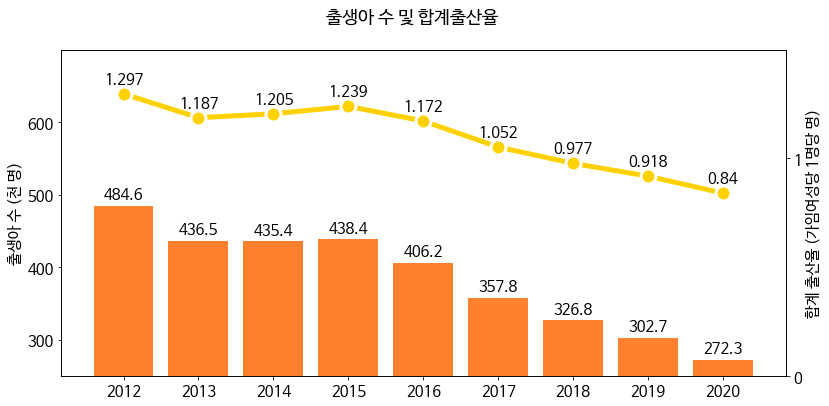

In [44]:
fig, ax1 = plt.subplots(figsize=(13,6))
fig.suptitle('출생아 수 및 합계출산율')

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])

ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
  ax1.text(idx, val + 10, val, ha='center')

ax2 = ax1.twinx()  #x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('합계 출산율 (가임여성당 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3)
for idx, val in enumerate(df['합계 출산율']):
  ax2.text(idx, val + 0.05, val, ha='center')